# Capstone project - HealthCare Fraud Detection : Support Vector Machine Models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn 
patch_sklearn()
from sklearn import preprocessing
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import train_test_split,\
StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.feature_selection import RFE
from yellowbrick.classifier import confusion_matrix, classification_report, ROCAUC
from yellowbrick.model_selection import CVScores
from cp_clean_helper import show_values
from LGR_helper import std_num_cols, rb_scale_cols, model_results, get_confusion_matrix
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### # Loading datasets, and looking at shapes:-

In [2]:
# Loading train-test 70:30 split (SMOTE and BorderlineSMOTE) datasets
# For these same columns have been drooped as done for the LGR model

trainX_SM = pd.read_csv("trainX_SM.csv",index_col=0)
trainY_SM = pd.read_csv("trainY_SM.csv",index_col=0)
testX_SM = pd.read_csv("testX_SM.csv",index_col=0)
testY_SM = pd.read_csv("testY_SM.csv",index_col=0)

trainX_BSM = pd.read_csv("trainX_BSM.csv",index_col=0)
trainY_BSM = pd.read_csv("trainY_BSM.csv",index_col=0)
testX_BSM = pd.read_csv("testX_BSM.csv",index_col=0)
testY_BSM = pd.read_csv("testY_BSM.csv",index_col=0)

# Looking at dataset shapes

print('\n')
print('Shape of SMOTE balanced trainX data :',trainX_SM.shape)
print('Shape of SMOTE balanced trainY data :',trainY_SM.shape)
print('Shape of SMOTE balanced testX data :',testX_SM.shape)
print('Shape of SMOTE balanced testY data :',testY_SM.shape)
print('Shape of Borderline SMOTE balanced trainX data :',trainX_BSM.shape)
print('Shape of Borderline SMOTE balanced trainY data :',trainY_BSM.shape)
print('Shape of Borderline SMOTE balanced testX data :',testX_BSM.shape)
print('Shape of Borderline SMOTE balanced testY data :',testY_BSM.shape, end='\n')
print('\n')
print("*"*60)

# Looking at class ratios

print('\n')
print('Class ratio - Fraud/Non-Fraud (trainY_SM) :',trainY_SM.value_counts(normalize=True)*100)
print('Class ratio - Fraud/Non-Fraud (testY_SM) :',testY_SM.value_counts(normalize=True)*100)
print('Class ratio - Fraud/Non-Fraud (trainY_BSM) :',trainY_BSM.value_counts(normalize=True)*100)
print('Class ratio - Fraud/Non-Fraud (testY_BSM) :',testY_BSM.value_counts(normalize=True)*100, end='\n')
print('\n')
print("*"*60)



Shape of SMOTE balanced trainX data : (483580, 44)
Shape of SMOTE balanced trainY data : (483580, 1)
Shape of SMOTE balanced testX data : (207250, 44)
Shape of SMOTE balanced testY data : (207250, 1)
Shape of Borderline SMOTE balanced trainX data : (483580, 44)
Shape of Borderline SMOTE balanced trainY data : (483580, 1)
Shape of Borderline SMOTE balanced testX data : (207250, 44)
Shape of Borderline SMOTE balanced testY data : (207250, 1)


************************************************************


Class ratio - Fraud/Non-Fraud (trainY_SM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64
Class ratio - Fraud/Non-Fraud (testY_SM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64
Class ratio - Fraud/Non-Fraud (trainY_BSM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64
Class ratio - Fraud/Non-Fraud (testY_BSM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64


*******

### # Standardizing the train/test features for balanced datasets:

In [3]:
# SMOTE balanced dataset

std_num_cols(trainX_SM)
std_num_cols(testX_SM)

# BorderlineSMOTE balanced dataset

std_num_cols(trainX_BSM)
std_num_cols(testX_BSM)

### Baseline Linear Support Vector Classifier Model - Standardized

In [4]:
# SMOTE Balanced

# svm_std = LinearSVC(random_state=0, verbose=1)
# model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, svm_std, show = True)

In [5]:
# BorderlineSMOTE Balanced

# svm_std = LinearSVC(random_state=0, verbose=1)
# model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, svm_std, show = True)

### # Robust Scaling the train/test features for  balanced datasets:

In [6]:
# SMOTE balanced dataset

rb_scale_cols(trainX_SM)
rb_scale_cols(testX_SM)

# BorderlineSMOTE balanced dataset

rb_scale_cols(trainX_BSM)
rb_scale_cols(testX_BSM)

### Baseline Linear Support Vector Classifier Model - Robust Scaled

In [7]:
# SMOTE Balanced

# svm_rb = LinearSVC(random_state=0,verbose=1)
# model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, svm_rb, show = True)

In [8]:
# BorderlineSMOTE Balanced

# svm_rb = LinearSVC(random_state=0,verbose=1)
# model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, svm_rb, show = True)

## Using RandomSearchCV to select best parameters (SM):

In [9]:
# Setting x and y variables

# x1 = trainX_SM 
# y1 = trainY_SM

# Setting model required parameters

# svm_base_sm = LinearSVC(random_state=0,verbose=1)

# Setting the parameter grid

# grid_para_svm = [{
#     "C": [0.0001, 0.01, 1, 100, 10000, 1000000, 100000000]}]

# Running the RF model through the grid search

# grid_search_svm = RandomizedSearchCV(svm_base_sm, grid_para_svm,\
#                                      cv=5, scoring='f1_weighted',\
#                                      return_train_score = True, n_jobs=-1)

# grid_search_svm.fit(x1, y1)

In [10]:
# The best parameters

# grid_search_svm.best_params_

In [11]:
# The best score

# grid_search_svm.best_score_

In [12]:
# Best estimator training/test errors

# print("The training error is: %.5f" % (1 - grid_search_svm.best_estimator_.score(x1, y1)))
# print("The test     error is: %.5f" % (1 - grid_search_svm.best_estimator_.score(testX_SM, testY_SM)))

## Using RandomSearchCV to select best parameters (BSM):

In [13]:
# Setting x and y variables

# x2 = trainX_BSM 
# y2 = trainY_BSM

# Setting model required parameters

# svm_base_bsm = LinearSVC(random_state=0,verbose=1)

# Setting the parameter grid

# grid_para_svm = [{
#     "C": [0.0001, 0.01, 1, 100, 10000, 1000000, 100000000]}]

# Running the RF model through the grid search

# grid_search_svm = RandomizedSearchCV(svm_base_sm, grid_para_svm,\
#                                      cv=5, scoring='f1_weighted',\
#                                      return_train_score = True, n_jobs=-1)

# grid_search_svm.fit(x2, y2)

In [14]:
# The best parameters

# grid_search_svm.best_params_

In [15]:
# The best score

# grid_search_svm.best_score_

In [16]:
# Best estimator training/test errors

# print("The training error is: %.5f" % (1 - grid_search_svm.best_estimator_.score(x2, y2)))
# print("The test     error is: %.5f" % (1 - grid_search_svm.best_estimator_.score(testX_BSM, testY_BSM)))

### # Using Nystroem transformation:

In [17]:
# from sklearn.kernel_approximation import Nystroem

# feature_map_nystroem = Nystroem(gamma=.2,random_state=1,n_components=300)

# trainX_SM_tr = feature_map_nystroem.fit_transform(trainX_SM)
# testX_SM_tr = feature_map_nystroem.fit_transform(testX_SM)
# trainX_BSM_tr = feature_map_nystroem.fit_transform(trainX_BSM)
# testX_BSM_tr = feature_map_nystroem.fit_transform(testX_BSM)

In [18]:
# svm_rb = LinearSVC(random_state=0, verbose=1, C=1)
# model_results(trainX_SM_tr, trainY_SM, testX_SM_tr, testY_SM, svm_rb, show = True)

In [19]:
# svm_rb = LinearSVC(random_state=0, verbose=1, C=100)
# model_results(trainX_BSM_tr, trainY_BSM, testX_BSM_tr, testY_BSM, svm_rb, show = True)

### # Base LinearSVC models

In [20]:
# svm_rb = LinearSVC(random_state=0, verbose=1, C=1)
# model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, svm_rb, show = True)

In [21]:
# svm_rb = LinearSVC(random_state=0, verbose=1, C=100)
# model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, svm_rb, show = True)

### # Feature Selection with RFE:

In [22]:
# Extracting top 20 best features with RFE:

svm_sm = LinearSVC(random_state=0, verbose=1, C=1)
rfe1 = RFE(estimator=svm_sm, n_features_to_select=20, step=10)

# Running model to compare performance

model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, rfe1, show=True)

[LibLinear][LibLinear][LibLinear][LibLinear]The Model Results for  RFE(estimator=LinearSVC(C=1, random_state=0, verbose=1),
    n_features_to_select=20, step=10)
************************************************************
Train Accuracy is equal to 0.638
Test Accuracy is equal to 0.638
The Precision score is 1.000
The Average Precision score is 0.638
The Recall score is 0.275
The F1 score is 0.432
The AUC/ROC score is 0.638
True-Positive: 28546.000
True-Negative: 103616.000
False-Positive: 9.000
False-Negative: 75079.000
Correctly Classified: 132162.000
Incorrectly Classified: 75088.000


[0.6376959344886058,
 0.6376936067551267,
 0.9996848187707932,
 0.27547406513872136]

In [23]:
# Looking at RFE feature selection

print(trainX_SM.columns[rfe1.support_])

Index(['Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'Deceased', 'Age',
       'DOB_year', 'DOB_month', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'Hospital_Stay', 'Claim_Duration', 'Claim_Start_Year',
       'Claim_Start_Month', 'Insurance_Covered_Per', 'Total_Claim_Amt',
       'Physician_Count', 'Claim_Count', 'Hospital_Count', 'Chr_Cond_Count'],
      dtype='object')


In [24]:
# Extracting top 20 best features with RFE:

svm_bsm = LinearSVC(random_state=0, verbose=1, C=100)
rfe2 = RFE(estimator=svm_bsm, n_features_to_select=20, step=10)

# Running model to compare performance

model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, rfe2, show=True)

[LibLinear][LibLinear][LibLinear][LibLinear]The Model Results for  RFE(estimator=LinearSVC(C=100, random_state=0, verbose=1),
    n_features_to_select=20, step=10)
************************************************************
Train Accuracy is equal to 0.655
Test Accuracy is equal to 0.657
The Precision score is 1.000
The Average Precision score is 0.657
The Recall score is 0.314
The F1 score is 0.478
The AUC/ROC score is 0.657
True-Positive: 32519.000
True-Negative: 103616.000
False-Positive: 9.000
False-Negative: 71106.000
Correctly Classified: 136135.000
Incorrectly Classified: 71115.000


[0.6554696223996029,
 0.6568636911942098,
 0.9997233152975897,
 0.3138142340168878]

In [25]:
# Looking at RFE feature selection

print(trainX_BSM.columns[rfe2.support_])

Index(['Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'Deceased', 'Age',
       'DOB_year', 'DOB_month', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'Proc_Code_Cnt', 'Hospital_Stay', 'Claim_Duration', 'Claim_Start_Year',
       'Claim_Start_Month', 'Total_Claim_Amt', 'Physician_Count',
       'Claim_Count', 'Hospital_Count', 'Chr_Cond_Count'],
      dtype='object')


## Model performances:

In [26]:
selected_feat1 = trainX_SM.columns[rfe1.support_]
selected_feat2 = trainX_BSM.columns[rfe1.support_]

- Confusion matrix:

[LibLinear]

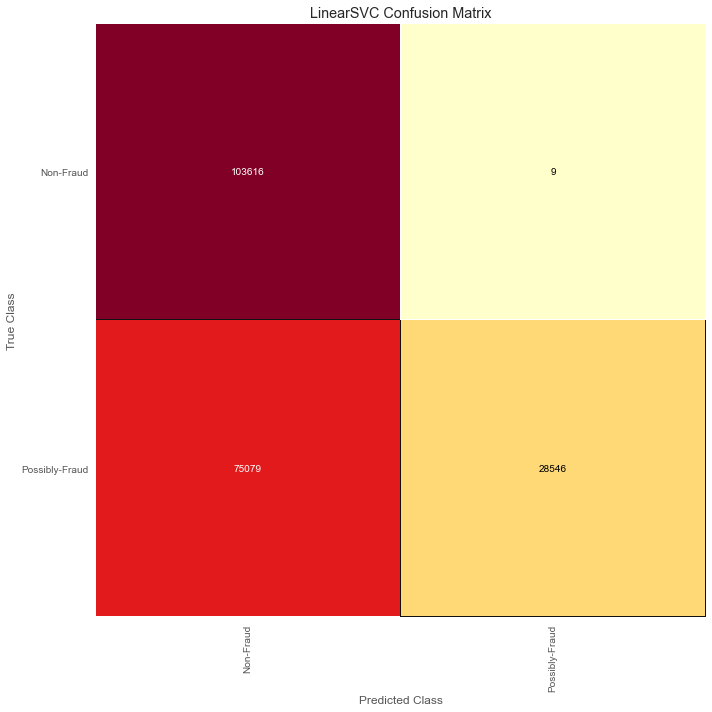

<AxesSubplot:title={'center':'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [27]:
# Visualizing the confusion matrix with Yellowbricks (thres=0.5)

plt.figure(figsize = (10,10))
viz = confusion_matrix(
    svm_sm,
    trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM,
    classes=['Non-Fraud', 'Possibly-Fraud'])
viz.show()

[LibLinear]

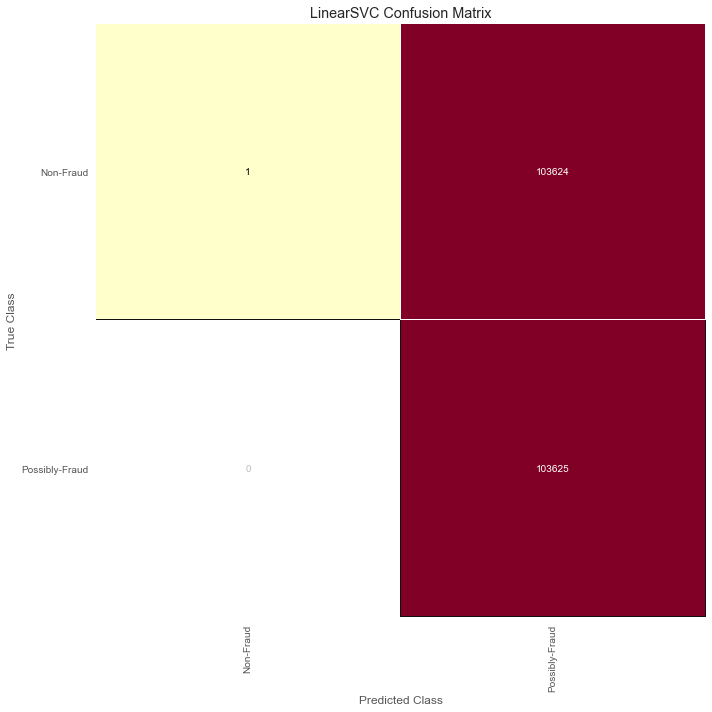

<AxesSubplot:title={'center':'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [28]:
# Visualizing the confusion matrix with Yellowbricks (thres=0.5)

plt.figure(figsize = (10,10))
viz = confusion_matrix(
    svm_bsm,
    trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM,
    classes=['Non-Fraud', 'Possibly-Fraud'])
viz.show()

- AUC/ROC Curve

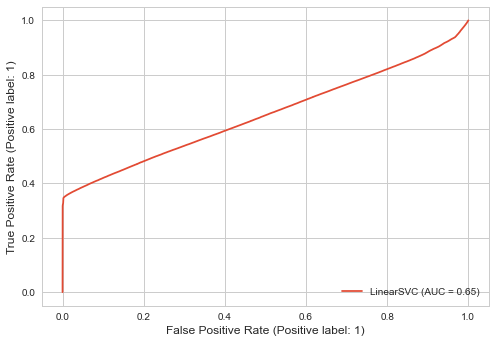

In [38]:
# Visualizing the AUC/ROC curve with sklearn function

from sklearn.metrics import plot_roc_curve

plot_roc_curve(svm_sm, trainX_SM[selected_feat1], trainY_SM)

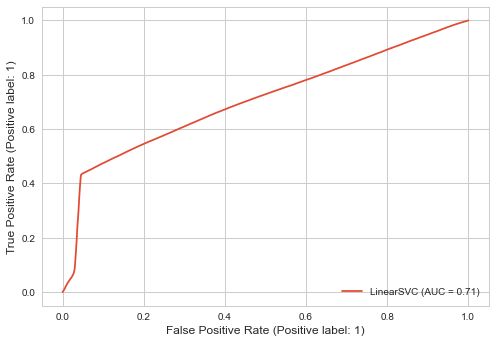

In [39]:
# Visualizing the AUC/ROC curve with sklearn function

plot_roc_curve(svm_bsm, trainX_BSM[selected_feat2], trainY_BSM)

- Classification Report

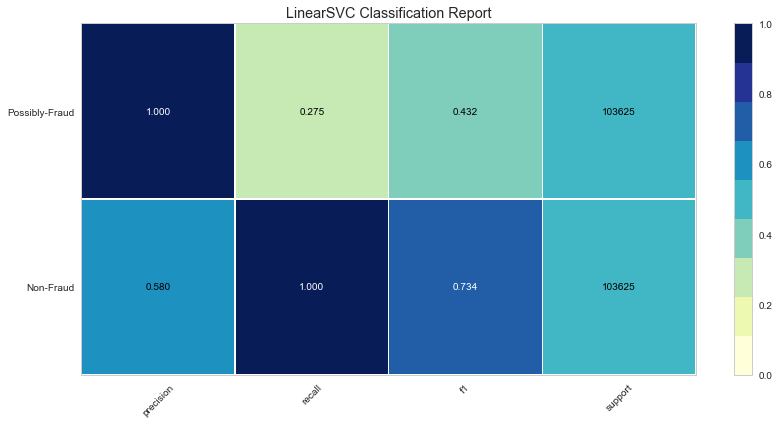

<AxesSubplot:title={'center':'LinearSVC Classification Report'}>

In [31]:
# Visualizing the classification report with Yellowbricks

plt.figure(figsize = (12,6))
sns.set_style("whitegrid")

visualizer = classification_report(
    svm_sm,
    trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM,
    classes=['Non-Fraud', 'Possibly-Fraud'],
    cmap='YlGnBu',
    support=True)

visualizer.show()

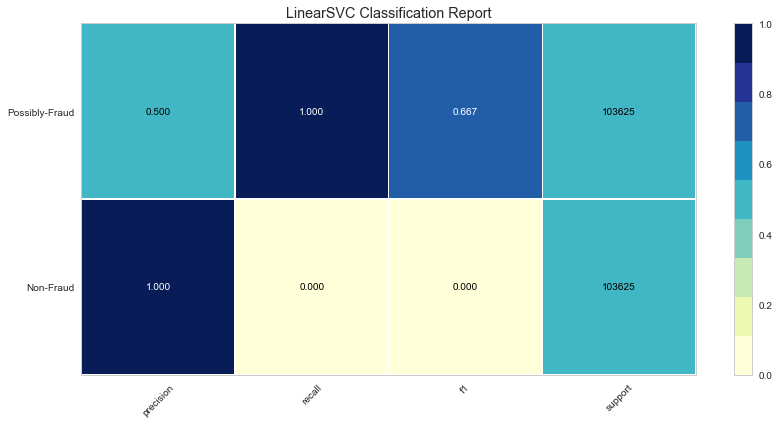

<AxesSubplot:title={'center':'LinearSVC Classification Report'}>

In [32]:
# Visualizing the classification report with Yellowbricks

plt.figure(figsize = (12,6))
sns.set_style("whitegrid")

visualizer = classification_report(
    svm_bsm,
    trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM,
    classes=['Non-Fraud', 'Possibly-Fraud'],
    cmap='YlGnBu',
    support=True)

visualizer.show()

- Precision-Recall Curve

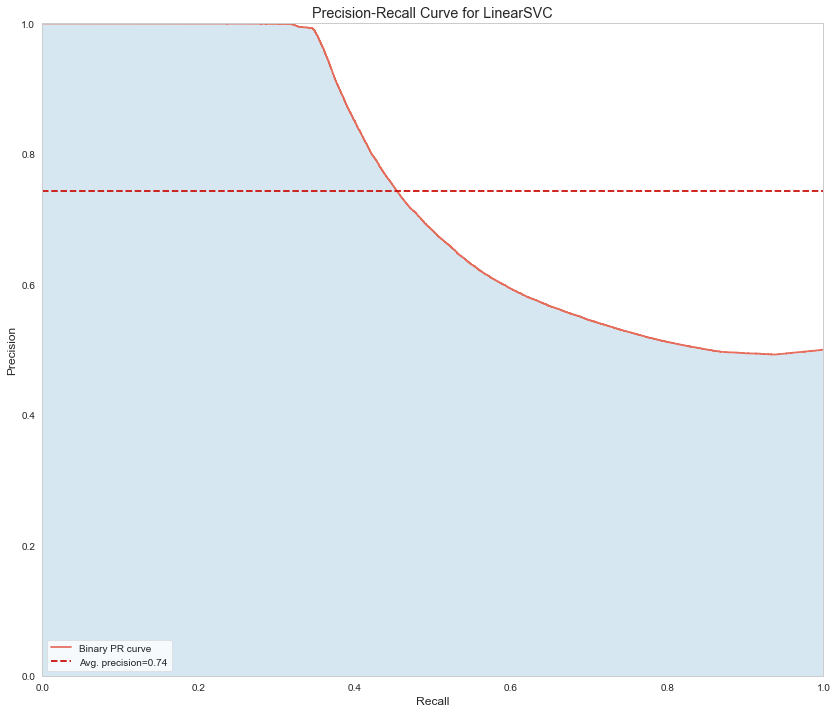

<AxesSubplot:title={'center':'Precision-Recall Curve for LinearSVC'}, xlabel='Recall', ylabel='Precision'>

In [33]:
# Visualizing precision-recall curve

from yellowbrick.classifier import precision_recall_curve

plt.figure(figsize = (14,12))
sns.set_style("whitegrid")
viz = precision_recall_curve(svm_sm, trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM)
viz.show()

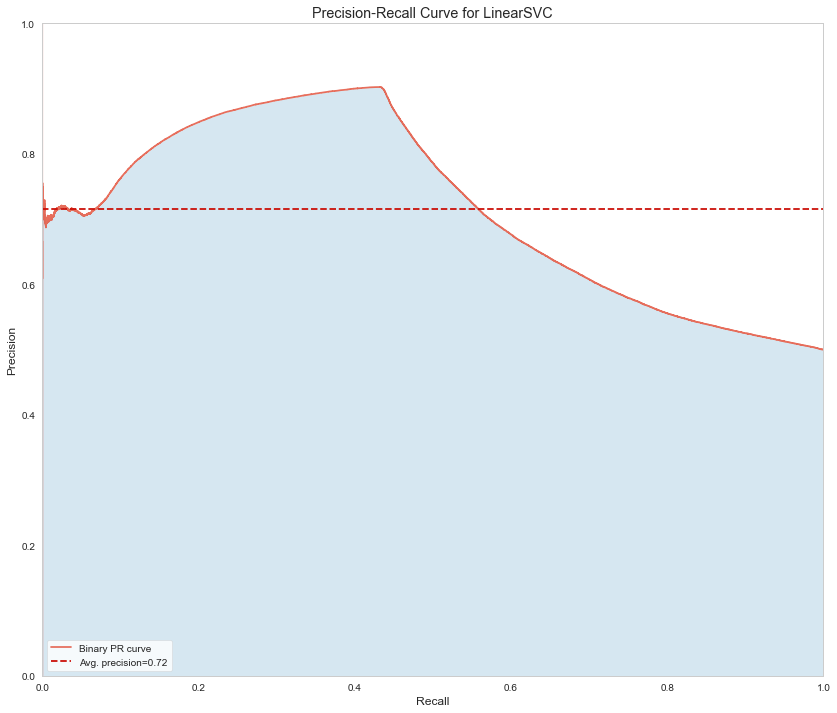

<AxesSubplot:title={'center':'Precision-Recall Curve for LinearSVC'}, xlabel='Recall', ylabel='Precision'>

In [34]:
plt.figure(figsize = (14,12))
sns.set_style("whitegrid")
viz = precision_recall_curve(svm_bsm, trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM)
viz.show()

- Prediction Error graphs

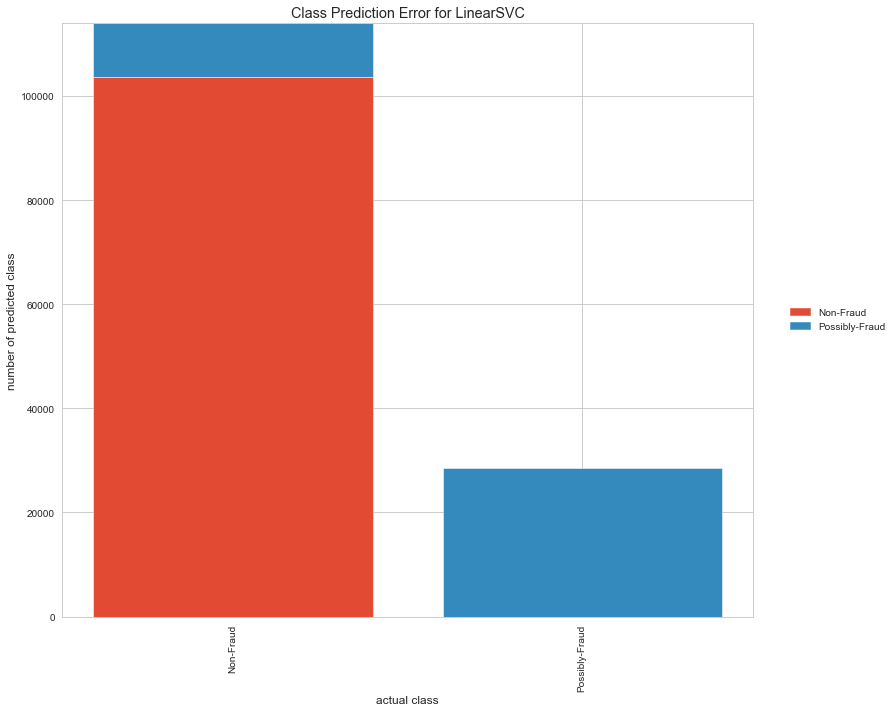

<AxesSubplot:title={'center':'Class Prediction Error for LinearSVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [35]:
# Visualizing prediction error

from yellowbrick.classifier import class_prediction_error

plt.figure(figsize = (14,10))
sns.set_style("whitegrid")
viz = class_prediction_error(
    svm_sm,
    trainX_SM[selected_feat1], trainY_SM.values.ravel(),
    testX_SM[selected_feat1], testY_SM.values.ravel(),
    classes=['Non-Fraud', 'Possibly-Fraud'])

viz.show()

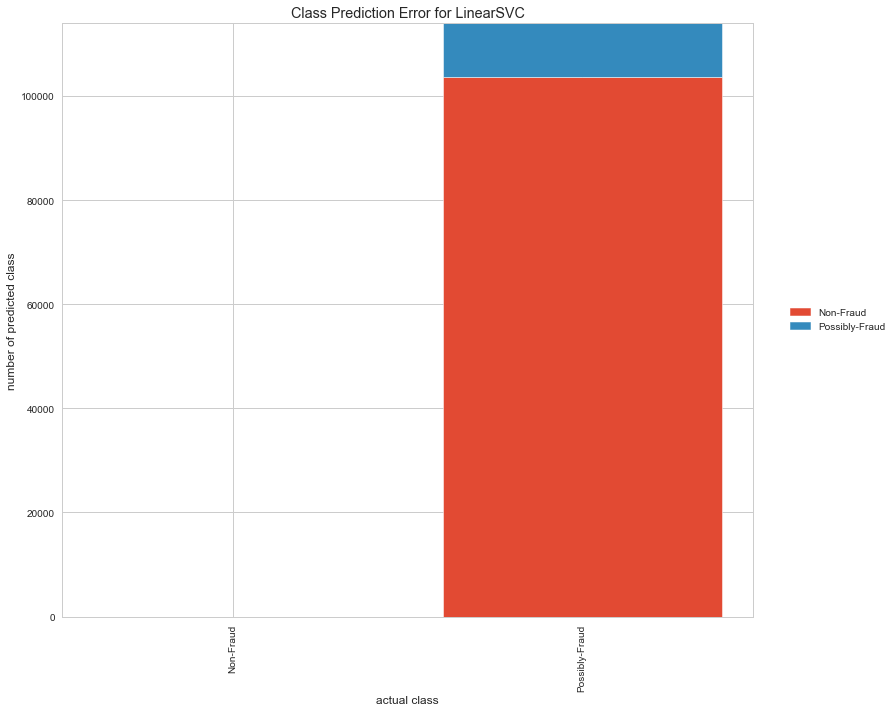

<AxesSubplot:title={'center':'Class Prediction Error for LinearSVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [36]:
# Visualizing prediction error

plt.figure(figsize = (14,10))
sns.set_style("whitegrid")
viz = class_prediction_error(
    svm_bsm,
    trainX_BSM[selected_feat2], trainY_BSM.values.ravel(),
    testX_BSM[selected_feat2], testY_BSM.values.ravel(),
    classes=['Non-Fraud', 'Possibly-Fraud'])

viz.show()